# NLP



* Amazon review analysis

* Create a presentation on the main problem

* use Machine learning classification algorithm and also use ANN for multi classification



**Goal**: *Enter a review and then the AI is able to give it a rate*


In [ ]:
# dataset= https://www.kaggle.com/datasets/datafiniti/consumer-reviews-of-amazon-products/code

In [ ]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/consumer-reviews-of-amazon-products/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv
/kaggle/input/consumer-reviews-of-amazon-products/1429_1.csv
/kaggle/input/consumer-reviews-of-amazon-products/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv


In [ ]:
pip install --user -U nltk

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score, classification_report

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB

import nltk

from nltk.corpus import stopwords

from wordcloud import WordCloud

import re

from xgboost import XGBClassifier

from scipy.sparse import hstack

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.preprocessing.sequence import pad_sequences

from nltk.tokenize import word_tokenize

from nltk.stem import PorterStemmer

from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize

import tensorflow as tf

import random

from scipy.sparse import hstack

from scipy.sparse import csr_matrix

nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
data=pd.read_csv("dataset\amazon_reviews.csv")

data

/tmp/ipykernel_30/2335082022.py:1: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("/kaggle/input/consumer-reviews-of-amazon-products/1429_1.csv")


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34655,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-09-18T00:00:00Z,NaN,2015-08-29T00:00:00Z,...,NaN,NaN,NaN,3.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,This is not appreciably faster than any other ...,Not appreciably faster than any other 1.8A cha...,NaN,NaN,Kris
34656,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-11-21T00:00:00Z,NaN,2015-09-02T00:00:00Z,...,NaN,NaN,NaN,1.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,Amazon should include this charger with the Ki...,Should be included,NaN,NaN,Jonathan Stewart
34657,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-10-19T00:00:00Z,NaN,2015-09-04T00:00:00Z,...,NaN,NaN,NaN,1.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,Love my Kindle Fire but I am really disappoint...,Disappointing Charger,NaN,NaN,J Lawson
34658,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Ser

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [ ]:
data.isnull().sum()

id                          0
name                     6760
asins                       2
brand                       0
categories                  0
keys                        0
manufacturer                0
reviews.date               39
reviews.dateAdded       10621
reviews.dateSeen            0
reviews.didPurchase     34659
reviews.doRecommend       594
reviews.id              34659
reviews.numHelpful        529
reviews.rating             33
reviews.sourceURLs          0
reviews.text                1
reviews.title               6
reviews.userCity        34660
reviews.userProvince    34660
reviews.username            7
dtype: int64

In [ ]:
data.describe()

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,1.0,34131.000000,34627.000000,0.0,0.0
mean,111372787.0,0.630248,4.584573,NaN,NaN
std,NaN,13.215775,0.735653,NaN,NaN
min,111372787.0,0.000000,1.000000,NaN,NaN
25%,111372787.0,0.000000,4.000000,NaN,NaN
50%,111372787.0,0.000000,5.000000,NaN,NaN
75%,111372787.0,0.000000,5.000000,NaN,NaN
max,111372787.0,814.000000,5.000000,NaN,NaN


In [ ]:
import random



n_samples = 5



for _ in range(n_samples):

    i = random.choice(range(data.shape[0]))

    print(f"REVIEW TEXT:\n{data['reviews.text'][i]} \n\nRATE:\n{data['reviews.rating'][i]}")

    print('\n', 90*"-", '\n')

REVIEW TEXT:
Easy to set up. Very responsive. Excellent sound quality. 

RATE:
5.0

 ------------------------------------------------------------------------------------------ 

REVIEW TEXT:
I got this for only $50 with my Harmony remote and I really like the way it works 

RATE:
5.0

 ------------------------------------------------------------------------------------------ 

REVIEW TEXT:
It takes a lot of time and subscribing to get the channels I want, so I will write another review next year when I got them all..hopefully !! 

RATE:
2.0

 ------------------------------------------------------------------------------------------ 

REVIEW TEXT:
I had no idea how great of a purchase this would be for my family period I am the father of 4 girls and this device is used more than any other device in our home. Because of it our home is filled with more music laughter singing and dancing than ever before. 

RATE:
5.0

 -----------------------------------------------------------------------

In [ ]:
data_2 = data[["reviews.text", "reviews.rating"]]

data_2.head()

,reviews.text,reviews.rating
0,This product so far has not disappointed. My c...,5.0
1,great for beginner or experienced person. Boug...,5.0
2,Inexpensive tablet for him to use and learn on...,5.0
3,I've had my Fire HD 8 two weeks now and I love...,4.0
4,I bought this for my grand daughter when she c...,5.0


In [ ]:
data_2.isnull().sum()

reviews.text       1
reviews.rating    33
dtype: int64

In [ ]:
data_2['reviews.rating'].value_counts().sort_index(ascending=False)

reviews.rating
5.0    23775
4.0     8541
3.0     1499
2.0      402
1.0      410
Name: count, dtype: int64

In [ ]:
data_2.dropna(inplace=True)

data_2.isnull().sum()

/tmp/ipykernel_30/804600281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2.dropna(inplace=True)


reviews.text      0
reviews.rating    0
dtype: int64

In [ ]:
data_2.describe()

,reviews.rating
count,34626.000000
mean,4.584561
std,0.735660
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
sentiment_score = {1: 0,

                   2: 0,

                   3: 0,

                   4: 1,

                   5: 1}



sentiment = {0: 'NEGATIVE',

             1: 'POSITIVE'}





# mapping

data_2['sentiment_score'] = data_2['reviews.rating'].map(sentiment_score)

data_2['sentiment'] = data_2['sentiment_score'].map(sentiment)



data_2.head()

/tmp/ipykernel_30/843581273.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['sentiment_score'] = data_2['reviews.rating'].map(sentiment_score)
/tmp/ipykernel_30/843581273.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['sentiment'] = data_2['sentiment_score'].map(sentiment)


,reviews.text,reviews.rating,sentiment_score,sentiment
0,This product so far has not disappointed. My c...,5.0,1,POSITIVE
1,great for beginner or experienced person. Boug...,5.0,1,POSITIVE
2,Inexpensive tablet for him to use and learn on...,5.0,1,POSITIVE
3,I've had my Fire HD 8 two weeks now and I love...,4.0,1,POSITIVE
4,I bought this for my grand daughter when she c...,5.0,1,POSITIVE


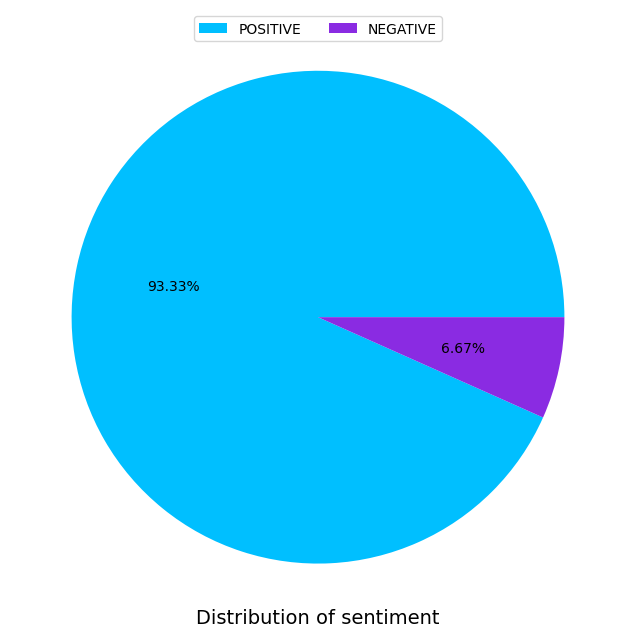

In [ ]:
plt.figure(figsize = (8, 8))



labels = ['POSITIVE', 'NEGATIVE']

colors = [ '#00BFFF',  '#8A2BE2']

plt.pie(data_2['sentiment'].value_counts(), autopct='%0.2f%%',colors=colors)



plt.title('Distribution of sentiment', size=14, y=-0.01)

plt.legend(labels, ncol=2, loc=9)



plt.savefig('Distribution_of_sentiment.png')

plt.show()

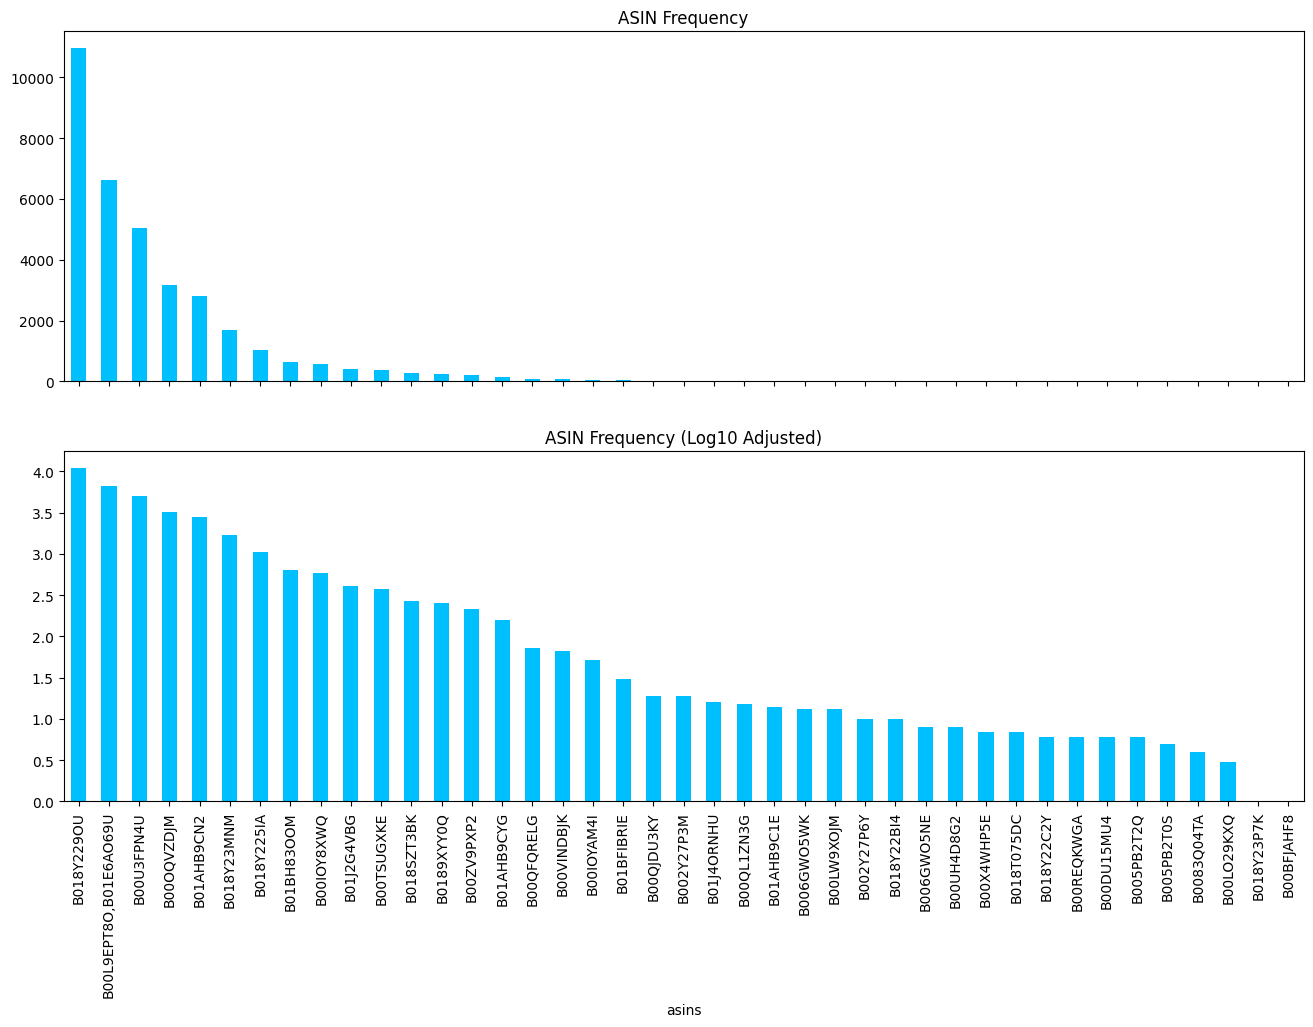

In [ ]:
colors = ['#00BFFF']

fig = plt.figure(figsize=(16,10))

ax1 = plt.subplot(211)

ax2 = plt.subplot(212, sharex = ax1)

data["asins"].value_counts().plot(kind="bar", ax=ax1, title="ASIN Frequency",color=colors)

np.log10(data["asins"].value_counts()).plot(kind="bar", ax=ax2,

                                               title="ASIN Frequency (Log10 Adjusted)",color=colors)



plt.savefig('ASIN_Frequency.png')

plt.show()

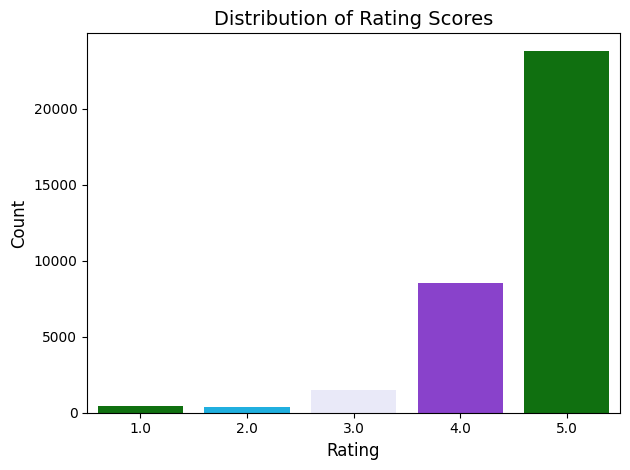

In [ ]:
# Use your custom color palette

colors = ['#008000', '#00BFFF', '#E6E6FA', '#8A2BE2']  # Adjust the number of colors if needed



# Create the count plot

sns.countplot(

    x=data_2['reviews.rating'],

    palette=colors,  # Use your custom palette

)



# Customize title, labels, and layout

plt.title('Distribution of Rating Scores', fontsize=14)

plt.xlabel('Rating', fontsize=12)

plt.ylabel('Count', fontsize=12)

plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

plt.tight_layout()  # Adjust spacing for clarity



# Save the plot as SVG

plt.savefig('ratings_count_bar_chart.png')

plt.show()

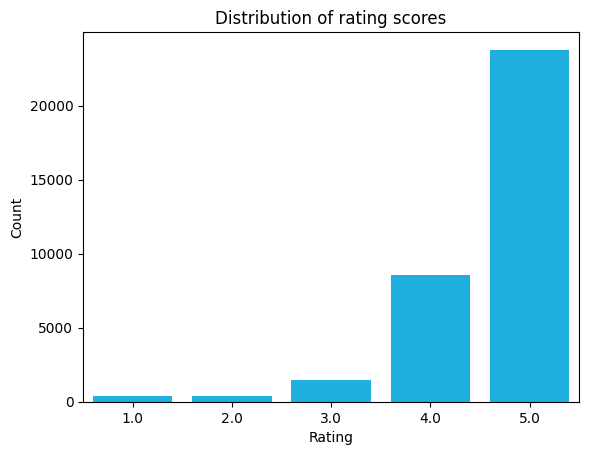

In [ ]:
colors = ['#00BFFF']

sns.countplot(x = data_2['reviews.rating'], palette=colors )

plt.title('Distribution of rating scores')

plt.xlabel('Rating')

plt.ylabel('Count')



plt.savefig('ratings_count_bar_chart.png')

plt.show()

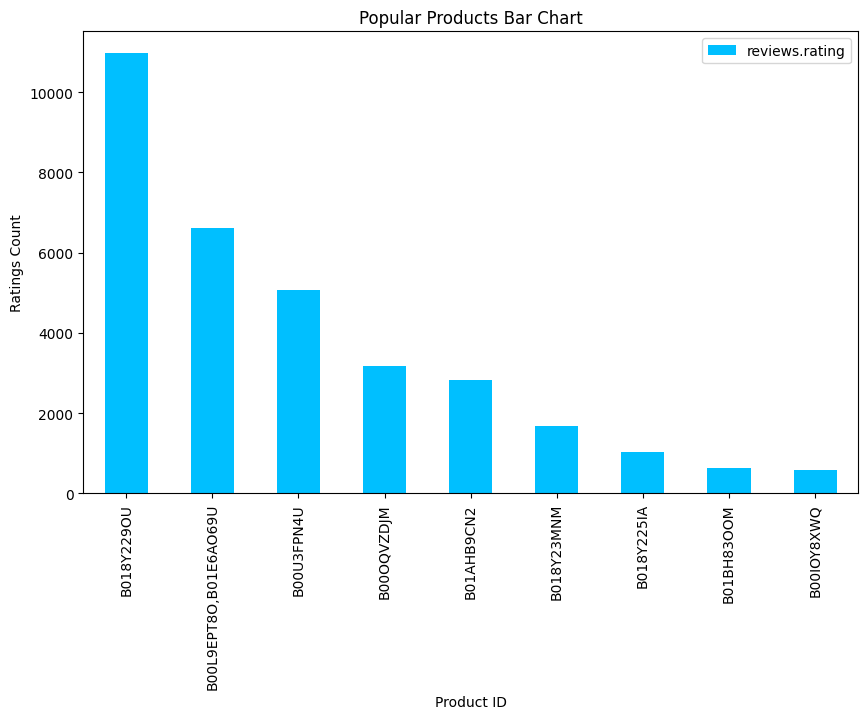

In [ ]:
popular_data = data.groupby("asins").filter(lambda x:x['reviews.rating'].count() >= 500)

popular_products = pd.DataFrame(popular_data.groupby('asins')['reviews.rating'].count())

popular_products = popular_products.sort_values('reviews.rating', ascending=False)



colors = ['#00BFFF', '#E6E6FA', '#8A2BE2', '#FFD700', '#DAA520', '#808080', '#000080']



ax = popular_products.plot(kind = "bar", figsize = (10, 6), color = colors)



ax.set_xlabel("Product ID")

ax.set_ylabel("Ratings Count")

ax.set_title("Popular Products Bar Chart")



plt.savefig('popular_products_bar_chart.png')

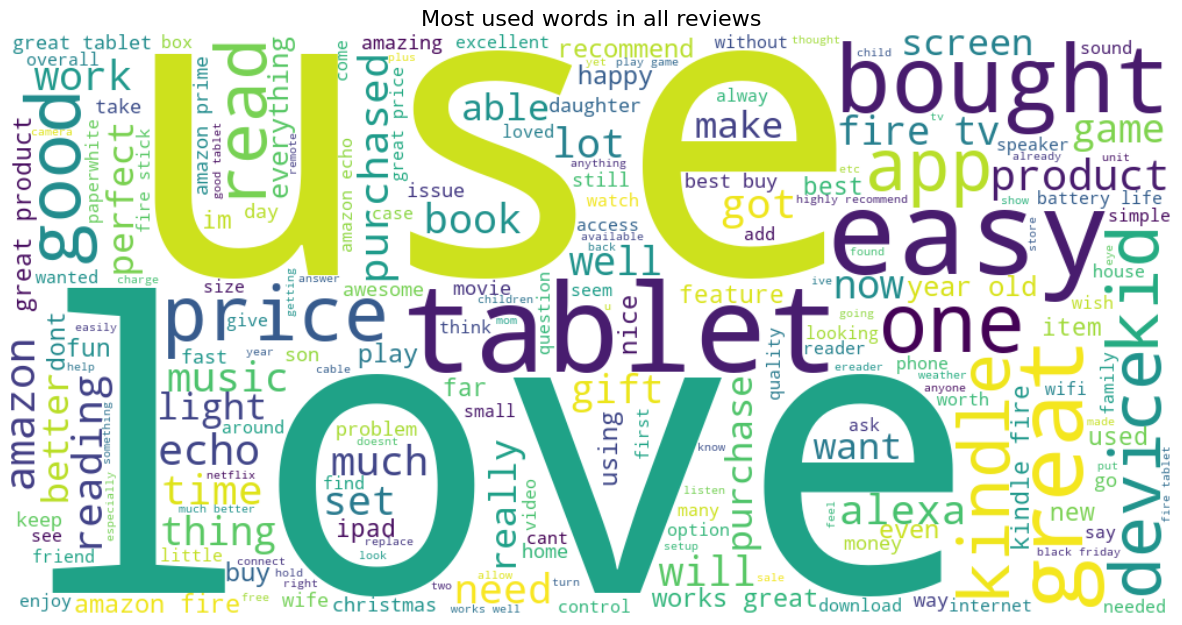

In [ ]:
# Preprocess text (optional, adjust based on your needs)

all_words = ' '.join(data_2['reviews.text']).lower()  # Join and lowercase text

all_words = re.sub(r'[^\w\s]', '', all_words)  # Remove non-alphanumeric characters



# Create the word cloud with white background

wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(all_words)



plt.figure(figsize=(15, 8))



# Display the word cloud

plt.imshow(wordcloud, interpolation='bilinear')



# Add title

plt.title("Most used words in all reviews", size=16)



# Turn off axes

plt.axis('off')



# Save the plot as PNG

plt.savefig('Most_used_words_in_all_reviws.png')

plt.show()

In [ ]:
data_3 = data[['reviews.username', 'asins', 'reviews.rating']]

data_3.head()

,reviews.username,asins,reviews.rating
0,Adapter,B01AHB9CN2,5.0
1,truman,B01AHB9CN2,5.0
2,DaveZ,B01AHB9CN2,5.0
3,Shacks,B01AHB9CN2,4.0
4,explore42,B01AHB9CN2,5.0


In [ ]:


# Set the random seeds

random.seed(0)

np.random.seed(0)

tf.random.set_seed(0)

In [ ]:
data_4 = data[['reviews.text', 'reviews.title', 'reviews.rating', 'reviews.doRecommend']]

data_4.head()

,reviews.text,reviews.title,reviews.rating,reviews.doRecommend
0,This product so far has not disappointed. My c...,Kindle,5.0,True
1,great for beginner or experienced person. Boug...,very fast,5.0,True
2,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,5.0,True
3,I've had my Fire HD 8 two weeks now and I love...,Good!!!,4.0,True
4,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,5.0,True


In [ ]:
data_4.isnull().sum()

reviews.text             1
reviews.title            6
reviews.rating          33
reviews.doRecommend    594
dtype: int64

In [ ]:
rows_to_drop = []



for index, row in data_4.iterrows():

    if pd.isnull(row['reviews.doRecommend']):

        if row['reviews.rating'] > 3:

            data_4.at[index, 'reviews.doRecommend'] = True

        elif row['reviews.rating'] < 3:

            data_4.at[index, 'reviews.doRecommend'] = False

        elif row['reviews.rating'] == 3:

            rows_to_drop.append(index)

    if pd.isnull(row['reviews.doRecommend']) and pd.isnull(row['reviews.rating']):

        rows_to_drop.append(index)



data_4.drop(rows_to_drop, inplace=True)



data_4

/tmp/ipykernel_30/2817697342.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_4.drop(rows_to_drop, inplace=True)


,reviews.text,reviews.title,reviews.rating,reviews.doRecommend
0,This product so far has not disappointed. My c...,Kindle,5.0,True
1,great for beginner or experienced person. Boug...,very fast,5.0,True
2,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,5.0,True
3,I've had my Fire HD 8 two weeks now and I love...,Good!!!,4.0,True
4,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,5.0,True
...,...,...,...,...
34654,This is exactly like any other usb power charg...,Not Necessary,1.0,False
34656,Amazon should include this charger with the Ki...,Should be included,1.0,False
34657,Love my Kindle Fire but I am really disappoint...,Disappointing Charger,1.0,False
34658,I was surprised to find it did not come with a...,Not worth the money,1.0,False


In [ ]:
nltk.download('stopwords')

nltk.download('punkt')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.stem import PorterStemmer

from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize

import re



ps = PorterStemmer()

stop_words = set(stopwords.words("english"))



reviews = []

recommendations = []

for i in range(len(data_4)):

    title = data_4['reviews.title'].iloc[i]

    text = data_4['reviews.text'].iloc[i]

    recommend = data_4['reviews.doRecommend'].iloc[i]



    if not isinstance(title, str):

        title = ""

    if not isinstance(text, str):

        text = ""



    combined_text = f"{title} {text}"



    keep_alphabet_only = re.sub('[^a-zA-Z]', ' ', combined_text)  # Remove non-alphabetical characters

    lowrecase_text = keep_alphabet_only.lower()  # Convert to lowercase

    tokenized_text = word_tokenize(lowrecase_text)  # Tokenize the text

    remove_stopwords = [ps.stem(word) for word in tokenized_text if word not in stop_words]  # Remove stopwords and stem words

    cleaned_text = ' '.join(remove_stopwords)  # Join tokens back into a single string



    reviews.append(cleaned_text)

    recommendations.append(int(recommend))

reviews

['kindl product far disappoint children love use like abil monitor control content see eas',
 'fast great beginn experienc person bought gift love',
 'beginn tablet year old son inexpens tablet use learn step nabi thrill learn skype alreadi',
 'good fire hd two week love tablet great valu prime member tablet shine love abl easili access prime content well movi download watch laterthi screen realli nice look nice crisp bright infact brighter ipad pro cost base model build fire insan awesom run mm thick smooth glossi feel back realli amaz hold like futurist tab ur hand',
 'fantast tablet kid bought grand daughter come visit set user enter age name amazon make sure access site content appropri age simpl love capabl also bought instal gig sd card give littl tablet plenti storag price think tablet best one spend hundr dollar addit speed capac come basic tablet everyth peopl ever need fraction cost',
 'expect amazon fire inch tablet perfect size purchas husband bigger screen phone gotten one

In [ ]:
cv = CountVectorizer()

x_text = cv.fit_transform(reviews)

In [ ]:
x_recommend = np.array(recommendations).reshape(-1, 1)

x = hstack([x_text, x_recommend])

In [ ]:
x.shape

(34598, 9551)

In [ ]:
print(x)

<COOrdinate sparse matrix of dtype 'int64'
	with 553608 stored elements and shape (34598, 9551)>
  Coords	Values
  (0, 4616)	1
  (0, 6486)	1
  (0, 2935)	1
  (0, 2241)	1
  (0, 1457)	1
  (0, 4960)	1
  (0, 8930)	1
  (0, 4844)	1
  (0, 9)	1
  (0, 5339)	1
  (0, 1777)	1
  (0, 1761)	1
  (0, 7275)	1
  (0, 2510)	1
  (1, 4960)	1
  (1, 2945)	1
  (1, 3636)	1
  (1, 827)	1
  (1, 2849)	1
  (1, 6118)	1
  (1, 1065)	1
  (1, 3455)	1
  (2, 8930)	1
  (2, 827)	1
  (2, 8190)	2
  :	:
  (34562, 9550)	1
  (34563, 9550)	1
  (34564, 9550)	1
  (34565, 9550)	1
  (34566, 9550)	1
  (34567, 9550)	1
  (34568, 9550)	1
  (34569, 9550)	1
  (34570, 9550)	1
  (34572, 9550)	1
  (34574, 9550)	1
  (34575, 9550)	1
  (34576, 9550)	1
  (34578, 9550)	1
  (34579, 9550)	1
  (34580, 9550)	1
  (34581, 9550)	1
  (34582, 9550)	1
  (34583, 9550)	1
  (34584, 9550)	1
  (34585, 9550)	1
  (34586, 9550)	1
  (34587, 9550)	1
  (34588, 9550)	1
  (34590, 9550)	1


In [ ]:
y = data_4['reviews.rating'].values - 1

y

array([4., 4., 4., ..., 0., 0., 0.])

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.15, random_state = 2)

In [ ]:
xgb = XGBClassifier(learning_rate = 0.2 , n_estimators = 200)

In [ ]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
model_accuracy_train = xgb.score(x_train , y_train)

print(f"Train Accuracy: {model_accuracy_train * 100:.2f}%")

Train Accuracy: 82.38%


In [ ]:
model_accuracy_test = xgb.score(x_test , y_test)

print(f"Test Accuracy: {model_accuracy_test * 100:.2f}%")

Test Accuracy: 72.93%


In [ ]:
title = input("Enter your review title: ")

text = input("Enter your review: ")

recommend = input("Do you recommend this product? (yes/no): ").strip().lower()



recommend = 1 if recommend == "yes" else 0



combined_input = f"{title} {text}"

l1 = []

clean = re.sub('[^a-zA-Z]',' ',combined_input)

clean = clean.lower()

clean = word_tokenize(clean)

clean = [ps.stem(word) for word in clean if word not in stop_words ]

clean = ' '.join(clean)

new_review_text = cv.transform([clean])

new_review_recommend = np.array([recommend]).reshape(1, -1)

new_review = hstack([new_review_text, new_review_recommend])

res = xgb.predict(new_review)



print(f"Predicted Review Rating: {int(res[0] + 1)}")

Enter your review title:  Problem with screen
Enter your review:  The tablet's quality is high and have a very good performance, but the screen was too small it feels hard to read on it
Do you recommend this product? (yes/no):  yes


Predicted Review Rating: 4


In [ ]:
y = to_categorical(data_4['reviews.rating'].values-1 , num_classes=5)  # Subtracting 1 to make ratings zero-indexed

In [ ]:
model = Sequential()

model.add(Dense(256, activation='relu', input_shape=(x.shape[1],)))

model.add(Dropout(0.6))

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.4))

model.add(Dense(64, activation='relu'))

model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))

model.add(Dense(16, activation='relu'))

model.add(Dense(5, activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
krs = tf.keras.models.Sequential([

    tf.keras.layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),

    tf.keras.layers.Dense(1, activation='sigmoid')

])

In [ ]:
krs.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
krs.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5


/opt/conda/lib/python3.10/site-packages/keras/src/losses/losses.py:22: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


828/828 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.0104 - loss: 0.0000e+00 - val_accuracy: 0.0122 - val_loss: 0.0000e+00
Epoch 2/5
828/828 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0104 - loss: 0.0000e+00 - val_accuracy: 0.0122 - val_loss: 0.0000e+00
Epoch 3/5
828/828 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0104 - loss: 0.0000e+00 - val_accuracy: 0.0122 - val_loss: 0.0000e+00
Epoch 4/5
828/828 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0104 - loss: 0.0000e+00 - val_accuracy: 0.0122 - val_loss: 0.0000e+00
Epoch 5/5
828/828 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0104 - loss: 0.0000e+00 - val_accuracy: 0.0122 - val_loss: 0.0000e+00


In [ ]:
loss, accuracy = krs.evaluate(x_train, y_train)

print(f"Train Accuracy: {accuracy * 100:.2f}%")



loss, accuracy = krs.evaluate(x_test, y_test)

print(f"Test Accuracy: {accuracy * 100:.2f}%")

919/919 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0118 - loss: 0.0000e+00
Train Accuracy: 1.16%
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0160 - loss: 0.0000e+00
Test Accuracy: 1.19%


In [ ]:
title = input("Enter your review title: ")

text = input("Enter your review: ")

recommend = input("Do you recommend this product? (yes/no): ").strip().lower()



# Convert 'recommend' to binary (1 for yes, 0 for no)

recommend = 1 if recommend == "yes" else 0



# Combine and preprocess review title and text

combined_input = f"{title} {text}"

l1=[]



clean = re.sub('[^a-zA-Z]', ' ', combined_input)

clean = clean.lower()

clean = word_tokenize(clean)

clean = [ps.stem(word) for word in clean if word not in stop_words]

clean = ' '.join(clean)



# Vectorize and prepare input for the neural network model

new_review_text = cv.transform([clean])

new_review_recommend = np.array([recommend]).reshape(1, -1)

new_review_combined = hstack([new_review_text, new_review_recommend]).toarray()



# Predict with the neural network model

nn_prediction = krs.predict(new_review_combined)

predicted_rating_nn = np.argmax(nn_prediction, axis=1)[0] + 1  # Convert to 1-5 rating



print(f"Neural Network Predicted Review Rating: {predicted_rating_nn}")

Enter your review title:  Problem with screen
Enter your review:  The tablet's quality is high and have a very good performance, but the screen was too small it feels hard to read on it
Do you recommend this product? (yes/no):  yes


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Neural Network Predicted Review Rating: 1


In [ ]:
from sklearn.naive_bayes import MultinomialNB

naive = MultinomialNB()

naive.fit(x_train, y_train)

MultinomialNB()

In [ ]:
pred = naive.predict(x_test)

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.72      0.23      0.35        56
         1.0       0.20      0.02      0.03        62
         2.0       0.33      0.15      0.20       212
         3.0       0.48      0.38      0.42      1329
         4.0       0.78      0.89      0.83      3531

    accuracy                           0.71      5190
   macro avg       0.50      0.33      0.37      5190
weighted avg       0.68      0.71      0.69      5190



In [ ]:
train_accuracy_naive= naive.score(x_train, y_train)
print(f"Train_Accuracy: {train_accuracy_naive * 100:.2f}%")


Train_Accuracy: 76.05%


In [ ]:
test_accuracy_naive= naive.score(x_test, y_test)

print(f"Train_Accuracy: {test_accuracy_naive * 100:.2f}%")

Train_Accuracy: 70.94%


In [ ]:
title = input("Enter your review title: ")

text = input("Enter your review: ")

recommend = input("Do you recommend this product? (yes/no): ").strip().lower()



recommend = 1 if recommend == "yes" else 0



combined_input = f"{title} {text}"

l1 = []

clean = re.sub('[^a-zA-Z]',' ',combined_input)

clean = clean.lower()

clean = word_tokenize(clean)

clean = [ps.stem(word) for word in clean if word not in stop_words ]

clean = ' '.join(clean)

new_review_text = cv.transform([clean])

new_review_recommend = np.array([recommend]).reshape(1, -1)

new_review = hstack([new_review_text, new_review_recommend])

res = naive.predict(new_review)



print(f"Predicted Review Rating: {int(res[0] + 1)}")

Enter your review title:  Problem with screen
Enter your review:  The tablet's quality is high and have a very good performance, but the screen was too small it feels hard to read on it
Do you recommend this product? (yes/no):  yes


Predicted Review Rating: 4
